In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


# Two Sample T-test

- The two sample t-test is also known as the independent samples, independent, and unpaired t-test. Moreover, this type of statistical test compares two averages (means) and will give you information if these two means are statistically different from each other. The t-test also tells you whether the differences are statistically significant. In other words it lets you know if those differences could have happened by chance.

**Hypotheses**
- Now, when performing t-tests you typically have the following two hypotheses:

 - Null hypotheses: Two group means are equal
 - Alternative hypotheses: Two group means are different (two-tailed)
 
**Assumptions**

- Assumption 1: Are the two samples `independent`?
- Assumption 2: Are the data from each of the 2 groups following a `normal distribution`?
- Assumption 3: Do the two samples have the same variances (`Homogeneity of Variance`)?


- We can carry out the `Mann-Whitney U test` in Python if your data is not normally distributed. Another option is to transform your dependent variable using `square root, log, or Box-Cox` in Python.

<a href="https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/">Source</a>

## Load Data

In [2]:
data = 'https://gist.githubusercontent.com/baskaufs/1a7a995c1b25d6e88b45/raw/4bb17ccc5c1e62c27627833a4f25380f27d30b35/t-test.csv'
df = pd.read_csv(data)

df.head()

,grouping,height
0,men,181.50
1,men,187.30
2,men,175.30
3,men,178.30
4,men,169.00


### Subsetting the Data

In [3]:
# Subset data
male = df.query('grouping == "men"')['height']
female = df.query('grouping == "women"')['height']

## Descriptive Statistics

In [4]:
df.groupby('grouping').describe()

height                                               
          count   mean  std    min    25%    50%    75%    max
grouping                                                      
men        7.00 179.87 6.22 169.00 176.80 181.50 183.85 187.30
women      7.00 171.06 5.70 165.20 166.65 170.30 173.75 181.10

## Checking the Normality (Normal Distritubtion) of Data

- The null hypothesis is that the data follows a normal distribution. Thus, we can infer that the data from both groups is normally distributed.

In [5]:
stats.shapiro(male)

stats.shapiro(female)

ShapiroResult(statistic=0.9550848603248596, pvalue=0.7756242156028748)

ShapiroResult(statistic=0.9197608828544617, pvalue=0.467536598443985)

## Checking the Homogeneity of Variances Assumption

- The null hypothesis is that the variances of the two groups are the similir or same. Thus, we can infer that the varianced of the data from both groups are not significantly different each other. 

In [6]:
stats.levene(male, female)

LeveneResult(statistic=0.026695150465104206, pvalue=0.8729335280501348)

## Carry Out a Two-Sample T-test

In [7]:
res = stats.ttest_ind(male, female, 
                      equal_var=True)

display(res)

Ttest_indResult(statistic=2.765444762721087, pvalue=0.017105701528166175)

In [8]:
import pingouin as pg

res = pg.ttest(male, female, correction=False) # 'correction = False' when we want to carry out Student's t-test
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.77,12,two-sided,0.02,"[1.87, 15.76]",1.48,3.601,0.72


In [9]:
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(male, female)

(2.7654447627210694, 0.017105701528166727, 12.0)

## Interpret the Results from a T-test

### Interpreting the P-value

the p-value of the test is 0.017106, which is less than the significance level alpha (e.g., 0.05). Furthermore, this means that we can conclude that the men’s average height is statistically different from the female’s average height. 

### Interpreting the Effect Size (Cohen’s D)

- The relative strength of e.g. the condition. d=0.2 should be considered a ‘small’ effect size, 0.5 is a ‘medium’ effect size, and that 0.8 is a ‘large’ effect size. This means that if two groups’ means don’t differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant.

### Interpreting the P-value

the p-value of the test is 0.017106, which is less than the significance level alpha (e.g., 0.05). Furthermore, this means that we can conclude that the men’s average height is statistically different from the female’s average height. 

### Interpreting the Bayes Factor 

When we are comparing two hypotheses, H1 (the alternate hypothesis) and H0 (the null hypothesis), the Bayes Factor is often written as `B10`. It can be defined mathematically as:

(Likelihood of data given H1) / (Likelihood of data given H0) = P(D|H1)/ P(D|H0)

|IF B10 IS…	|THEN YOU HAVE…|
|:--|:--|
|> 100|	Extreme evidence for H1|
|30 – 100|	Very strong evidence for H1|
|10 – 30	|Strong evidence for H1|
|3 – 10	|Moderate evidence for H1|
|1 – 3	|Anecdotal evidence for H0|
|1|	No evidence|
|1/3 – 1|	Anecdotal evidence for H0|
|1/3 – 1/10|	Moderate evidence for H0|
|1/10 – 1/30|	Strong evidence for H0|
|1/30 – 1/100	|Very strong evidence for H0|
|< 1/100|Extreme evidence for H0|

## Visualize the Data using Boxplots:

<AxesSubplot:xlabel='grouping', ylabel='height'>

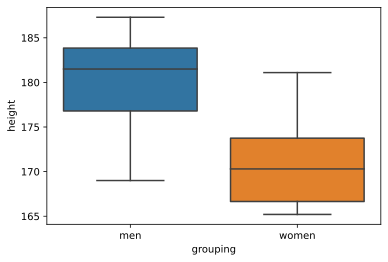

In [10]:
sns.boxplot(x='grouping', y='height', data=df)

## Visualize the Data using Violin Plots:

<AxesSubplot:xlabel='grouping', ylabel='height'>

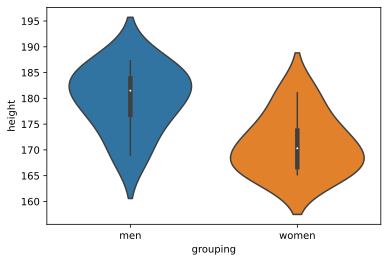

In [11]:
sns.violinplot(x='grouping', y='height', data=df)